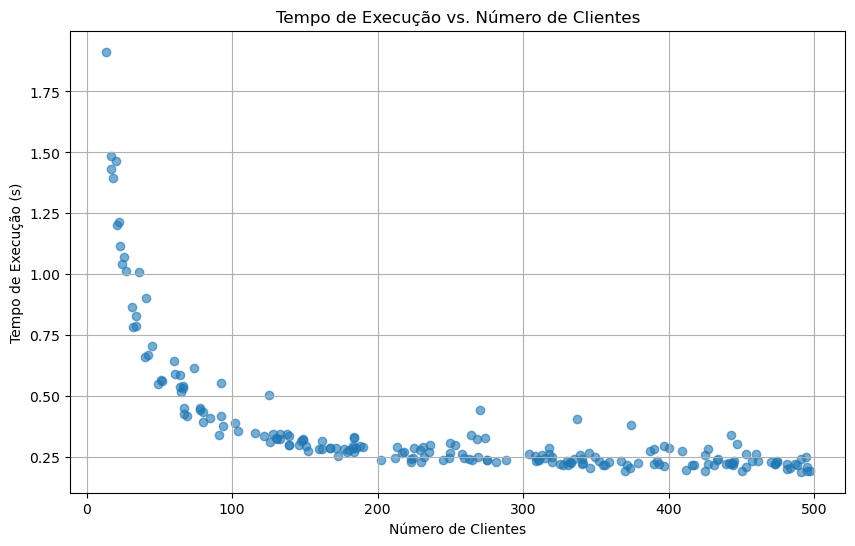

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define o caminho para o diretório de resultados
RESULTS_DIR = "data"
CLIENTS_CSV = os.path.join(RESULTS_DIR, "resultados_clientes.csv")

# Verifica se o arquivo de resultados existe
if os.path.exists(CLIENTS_CSV):
    # Lê os dados do arquivo CSV
    df_clientes = pd.read_csv(CLIENTS_CSV)

    # Cria o gráfico de dispersão (scatter plot)
    plt.figure(figsize=(10, 6))
    plt.scatter(df_clientes['num_clientes'], df_clientes['tempo_execucao_s'], alpha=0.6)

    # Adiciona títulos e rótulos aos eixos
    plt.title('Tempo de Execução vs. Número de Clientes')
    plt.xlabel('Número de Clientes')
    plt.ylabel('Tempo de Execução (s)')
    plt.grid(True)
    plt.show()
else:
    print(f"Arquivo não encontrado: {CLIENTS_CSV}")
    print("Execute o script executor.py primeiro.")

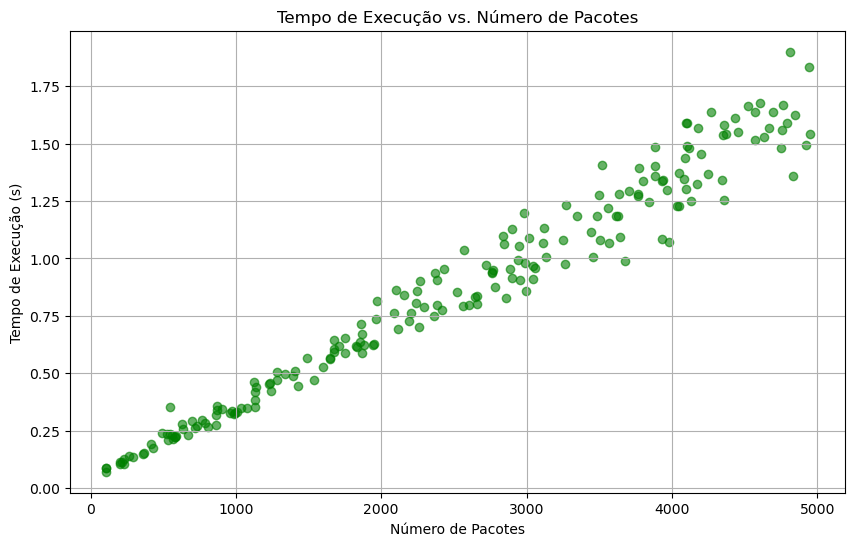

In [2]:
PACKAGES_CSV = os.path.join(RESULTS_DIR, "resultados_pacotes.csv")

# Verifica se o arquivo de resultados existe
if os.path.exists(PACKAGES_CSV):
    # Lê os dados do arquivo CSV
    df_pacotes = pd.read_csv(PACKAGES_CSV)

    # Cria o gráfico de dispersão
    plt.figure(figsize=(10, 6))
    plt.scatter(df_pacotes['num_pacotes'], df_pacotes['tempo_execucao_s'], alpha=0.6, color='green')

    # Adiciona títulos e rótulos aos eixos
    plt.title('Tempo de Execução vs. Número de Pacotes')
    plt.xlabel('Número de Pacotes')
    plt.ylabel('Tempo de Execução (s)')
    plt.grid(True)
    plt.show()
else:
    print(f"Arquivo não encontrado: {PACKAGES_CSV}")
    print("Execute o script executor.py primeiro.")

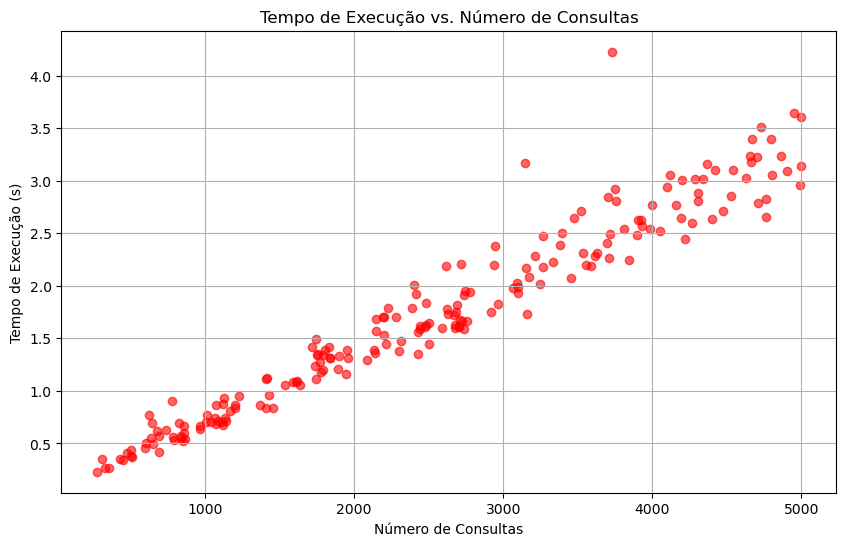

In [3]:
QUERIES_CSV = os.path.join(RESULTS_DIR, "resultados_consultas.csv")

# Verifica se o arquivo de resultados existe
if os.path.exists(QUERIES_CSV):
    # Lê os dados do arquivo CSV
    df_consultas = pd.read_csv(QUERIES_CSV)

    # Cria o gráfico de dispersão
    plt.figure(figsize=(10, 6))
    plt.scatter(df_consultas['num_consultas'], df_consultas['tempo_execucao_s'], alpha=0.6, color='red')

    # Adiciona títulos e rótulos aos eixos
    plt.title('Tempo de Execução vs. Número de Consultas')
    plt.xlabel('Número de Consultas')
    plt.ylabel('Tempo de Execução (s)')
    plt.grid(True)
    plt.show()
else:
    print(f"Arquivo não encontrado: {QUERIES_CSV}")
    print("Execute o script executor.py primeiro.")